## Import Semua Packages/Library yang Digunakan

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
dataset = pd.read_csv('Dataset/Food_and _Calories.csv')

In [3]:
dataset.head()

,Food,Serving,Calories
0,Artichoke,1 artichoke (128 g),60 cal
1,Arugula,1 leaf (2 g),1 cal
2,Asparagus,1 spear (12 g),2 cal
3,Aubergine,1 aubergine (458 g),115 cal
4,Beetroot,1 beet (82 g),35 cal


### Assessing Data

In [4]:
# periksa semua tipe data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      562 non-null    object
 1   Serving   562 non-null    object
 2   Calories  562 non-null    object
dtypes: object(3)
memory usage: 13.3+ KB


In [5]:
# menangani missing value
dataset.isna().sum()

Food        0
Serving     0
Calories    0
dtype: int64

In [6]:
print("jumlah data duplikat: ",dataset.duplicated().sum())
dataset.describe()

jumlah data duplikat:  13


,Food,Serving,Calories
count,562,562,562
unique,541,381,307
top,Avocado,1 tbsp (14 ml),124 cal
freq,2,30,15


### Cleaning Data

In [7]:
# menghapus data duplikat
dataset.drop_duplicates(inplace=True)
print("jumlah data duplikat: ",dataset.duplicated().sum())

jumlah data duplikat:  0


In [8]:
# membersihkan kolom calories dengan menghapus 'cal' dan mengkonversi ke numeric
dataset['Calories'] = dataset['Calories'].str.replace(' cal', '').astype(int)

In [9]:
# membersihkan kolom serving dengan mengekstrak nilai gram
dataset['Weight_g'] = dataset['Serving'].str.extract('(\d+)\s*g').astype(float)

In [10]:
# Cek hasil cleaning
print("\nHasil cleaning data:")
print(dataset.head())
print("\nInfo dataset setelah cleaning:")
dataset.info()


Hasil cleaning data:
        Food              Serving  Calories  Weight_g
0  Artichoke  1 artichoke (128 g)        60     128.0
1    Arugula         1 leaf (2 g)         1       2.0
2  Asparagus       1 spear (12 g)         2      12.0
3  Aubergine  1 aubergine (458 g)       115     458.0
4   Beetroot        1 beet (82 g)        35      82.0

Info dataset setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 549 entries, 0 to 561
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      549 non-null    object 
 1   Serving   549 non-null    object 
 2   Calories  549 non-null    int64  
 3   Weight_g  516 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 21.4+ KB


In [11]:
# Cek statistik deskriptif setelah cleaning
print("\nStatistik deskriptif setelah cleaning:")
print(dataset.describe())


Statistik deskriptif setelah cleaning:
          Calories     Weight_g
count   549.000000   516.000000
mean    230.781421   154.490310
std     233.412528   155.897981
min       1.000000     1.000000
25%      70.000000    61.750000
50%     161.000000   130.000000
75%     329.000000   218.250000
max    2209.000000  2301.000000


## Visualization 

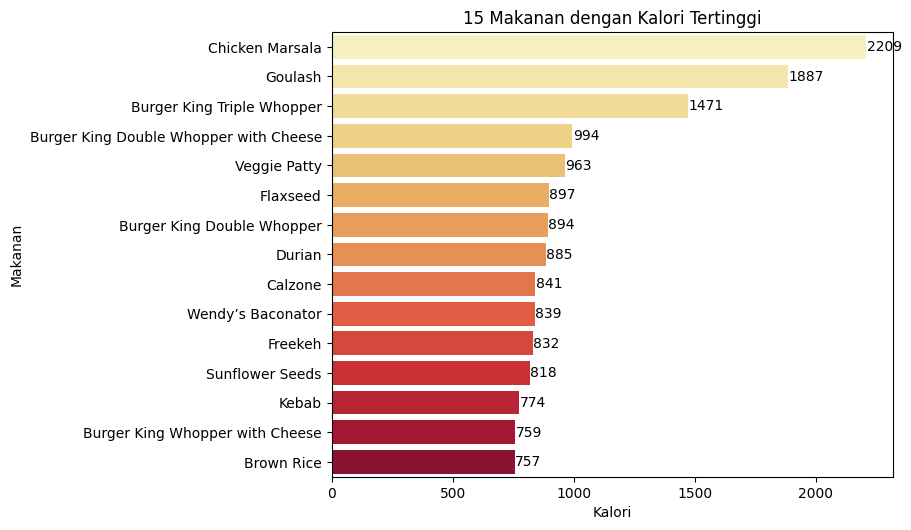

In [12]:
# 1. Top 15 Makanan dengan Kalori Tertinggi
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
top_15_calories = dataset.nlargest(15, 'Calories')
sns.barplot(data=top_15_calories, 
            y='Food', 
            x='Calories',
            palette='YlOrRd',
            hue= 'Food',
            legend=False
            )
for index, value in enumerate(top_15_calories['Calories']):
    plt.text(
        value + 2,
        index,
        f"{value}",
        va='center', ha='left', fontsize=10, color='black'
    )
plt.title('15 Makanan dengan Kalori Tertinggi')
plt.xlabel('Kalori')
plt.ylabel('Makanan')
plt.tight_layout()
plt.show()

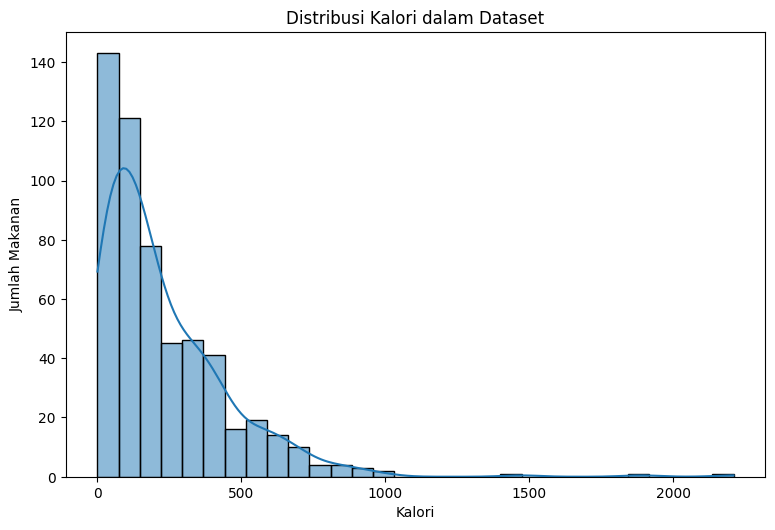

In [13]:
# 2. Distribusi Kalori
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2)
sns.histplot(data=dataset, 
              x='Calories', 
              bins=30, 
              kde=True)
plt.title('Distribusi Kalori dalam Dataset')
plt.xlabel('Kalori')
plt.ylabel('Jumlah Makanan')
plt.tight_layout()
plt.show()

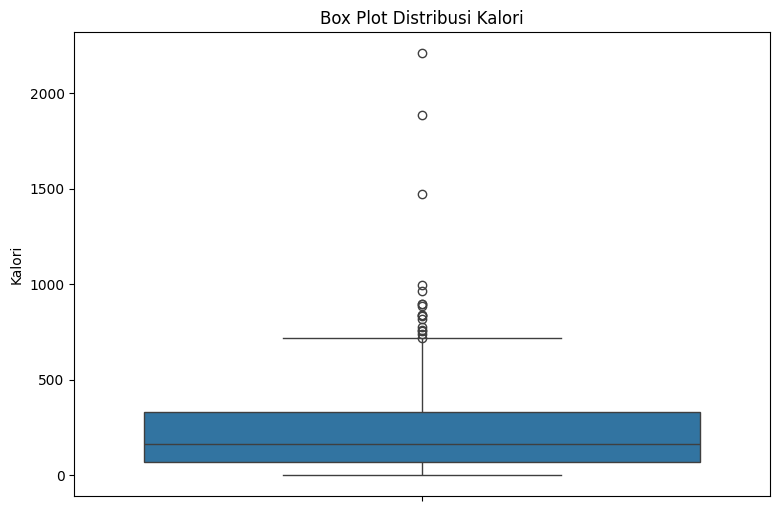

In [15]:
# 3. Box Plot untuk melihat outliers
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.boxplot(y=dataset['Calories'])
plt.title('Box Plot Distribusi Kalori')
plt.ylabel('Kalori')
plt.tight_layout()
plt.show()

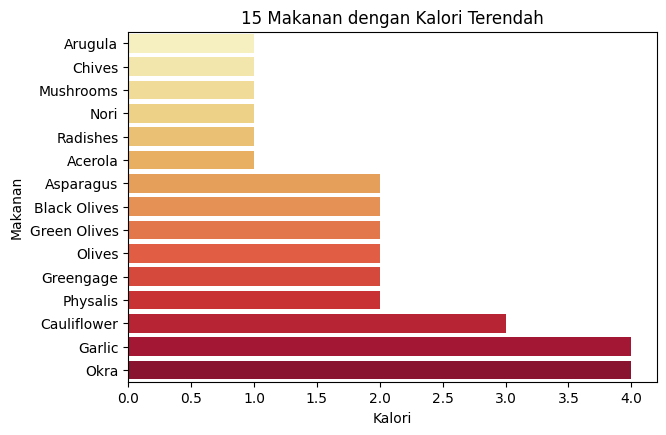

In [21]:
# 4. Bottom 15 Makanan dengan Kalori Terendah
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
bottom_15_calories = dataset.nsmallest(15, 'Calories')
sns.barplot(data=bottom_15_calories, 
            y='Food', 
            x='Calories',
            palette='YlOrRd',
            hue= 'Food',
            legend=False)
plt.title('15 Makanan dengan Kalori Terendah')
plt.xlabel('Kalori')
plt.ylabel('Makanan')
plt.show()

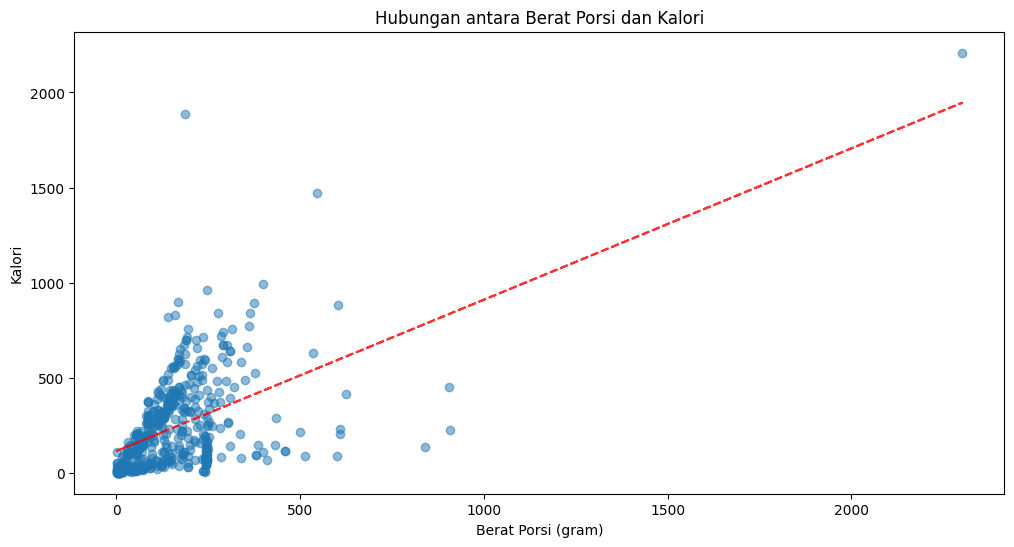

In [23]:
# Membuat visualisasi tambahan untuk serving size vs calories
plt.figure(figsize=(12, 6))

# Plot scatter dengan serving size
plt.scatter(dataset['Weight_g'], dataset['Calories'], alpha=0.5)
plt.xlabel('Berat Porsi (gram)')
plt.ylabel('Kalori')
plt.title('Hubungan antara Berat Porsi dan Kalori')

mask = ~dataset['Weight_g'].isna()
if mask.any():
    z = np.polyfit(dataset['Weight_g'][mask], dataset['Calories'][mask], 1)
    p = np.poly1d(z)
    plt.plot(dataset['Weight_g'][mask], p(dataset['Weight_g'][mask]), "r--", alpha=0.8)

plt.show()